In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('wine.txt', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                'Alcalinity of ash', 'Magnesium', 'Total phenols',
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1)酒精
2)苹果酸
3)灰
4)灰分的碱性
5)镁
6)总酚类化合物
7)类黄酮
8) Nonflavanoid酚类
9)原花青素
10)颜色强度
11)色调
12)OD280/OD315稀释葡萄酒
13)脯氨酸

In [4]:
# 查看几个标签
Class_label = np.unique(data['Class label'])
print(Class_label)

[1 2 3]


In [5]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
x, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [10]:
x_train.shape

(124, 13)

In [11]:
x_test.shape

(54, 13)

In [12]:
# n_estimators：森林中树的数量
forest = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

In [13]:
score = np.mean(cross_val_score(forest,x_train, y_train,cv=5,scoring='accuracy'))
print('平均性能得分：'+str(score))

平均性能得分：0.9676666666666666


In [14]:
importances = forest.feature_importances_
print("特征重要性：", importances)

特征重要性： [0.08442881 0.02719129 0.0153593  0.02514286 0.02567144 0.08423492
 0.13310239 0.01539246 0.02220997 0.20266762 0.08593531 0.12038371
 0.15827992]


In [15]:
# 可视化
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  

In [16]:
df=pd.DataFrame({'feature':data.columns[1:],'weight':importances})
df=df.sort_values('weight',ascending=False)
df

,feature,weight
9,Color intensity,0.202668
12,Proline,0.158280
6,Flavanoids,0.133102
11,OD280/OD315 of diluted wines,0.120384
10,Hue,0.085935
0,Alcohol,0.084429
5,Total phenols,0.084235
1,Malic acid,0.027191
4,Magnesium,0.025671
3,Alcalinity of ash,0.025143


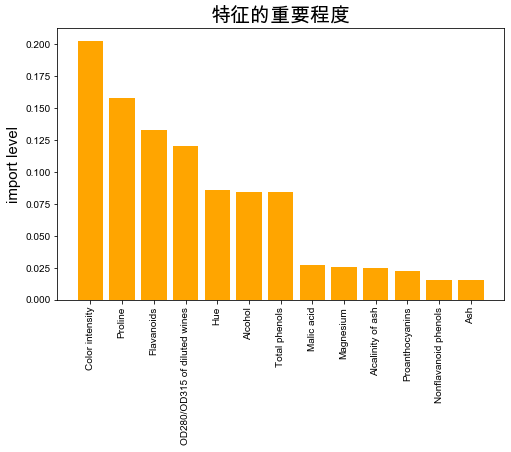

In [17]:
import pylab as pl
plt.figure(figsize=(8, 5))
pl.xticks(rotation=90)
plt.title('特征的重要程度',fontsize=20)
plt.bar(df['feature'],df['weight'],color = ['orange'])
plt.ylabel("import level", fontsize=15, rotation=90)
plt.show()